In [446]:
"""

This notebook retrieves hydrologic data from snow 
telemetry (SNOTEL) networks in the western United States.

Authors: Tony Castronova, Irene Garousi-Nejad, Raymond Hess

Last modified: 2024-06-21

"""

'\n\nThis notebook retrieves hydrologic data from snow \ntelemetry (SNOTEL) networks in the western United States.\n\nAuthors: Tony Castronova, Irene Garousi-Nejad, Raymond Hess\n\nLast modified: 2024-06-21\n\n'

In [407]:
%pwd

'/Users/rhess/Library/CloudStorage/GoogleDrive-rjh275@scarletmail.rutgers.edu/My Drive/30_Code/DataRetrieval_SWE'

In [408]:
### Installing dependencies ###
!pip install suds

In [409]:
### Importing libraries, pyhis.py and funcs.py are needed in the working directory for this script ###
import pyhis
import funcs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from suds.client import Client

In [410]:
serv = pyhis.Services()

In [411]:
### Specify bounding area for watershed of interest ###
minlat = 35.966999
maxlat = 36.7006926958913
minlon = -118.578979
maxlon = -118.267685

sites = serv.get_sites(minlon, minlat, maxlon, maxlat)

number of param sets: 99
converting to pandas dataframe
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 5658 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 5661 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 5572 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 163 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 5592 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97195 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 217 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 97198 - [-118.578979,35.966999,-118.267685,36.7006926958913] - 5626 -  got sites
got result
<class 'suds.sax.text.Text'>
process id: 971

In [412]:
### Previewing available networks ###
set(sites.servCode)

{CDEC, NLDAS_FORA, NLDAS_NOAH, NWISDV}

In [413]:
### Fetching server URL for data network ###
sites[sites.servCode=='CDEC'].iloc[0].servURL

https://hydroportal.cuahsi.org/CDEC/cuahsi_1_1.asmx

In [414]:
### Retrieving available site codes ###
sites[sites.servCode=='CDEC'].SiteCode

0    CDEC:CHP
1    CDEC:FRW
2    CDEC:TUN
3    CDEC:BCH
4    CDEC:CBT
5    CDEC:QUA
6    CDEC:UTY
7    CDEC:WTM
Name: SiteCode, dtype: object

In [436]:
### Specifying a link to the data ###
url = 'https://hydroportal.cuahsi.org/CDEC/cuahsi_1_1.asmx'   # url = sites.iloc[0].servURL
sitecode = 'CDEC:UTY'   #sitecode = sites.iloc[0].SiteCode

In [437]:
### Indexing SNOTEL station information ###
site_info = serv.get_sites_info([url],[sitecode])
site_info

,method,variableName,variableCode,datatype,valuetype,sampleMedium,startdt,enddt,name,lat,lon,siteid
0,No method specified,Snow depth,SNOW_DP,Unknown,Field Observation,Snow,2018-11-01,2100-01-01,UPPER TYNDALL CREEK,36.647182,-118.397285,CDEC:UTY
1,No method specified,Snow water equivalent,SNOW_WC,Unknown,Field Observation,Snow,1970-01-01,2100-01-01,UPPER TYNDALL CREEK,36.647182,-118.397285,CDEC:UTY
2,No method specified,Temperature,TEMP_AV,Average,Field Observation,Air,1999-09-04,1999-09-21,UPPER TYNDALL CREEK,36.647182,-118.397285,CDEC:UTY
3,No method specified,Temperature,TEMP_MX,Maximum,Field Observation,Air,1999-09-04,1999-09-21,UPPER TYNDALL CREEK,36.647182,-118.397285,CDEC:UTY
4,No method specified,Temperature,TEMP_MN,Minimum,Field Observation,Air,1999-09-04,1999-09-21,UPPER TYNDALL CREEK,36.647182,-118.397285,CDEC:UTY


In [438]:
### Specifying site variable information ###
var = site_info.iloc[0]
var.siteid

'CDEC:UTY'

In [439]:
### Creating a new instance of the soap class ###
client = Client(f'{url}?wsdl')

In [440]:
vals = client.service.GetValuesObject(var.siteid, var.variableCode, var.startdt, var.enddt)

In [441]:
dates = [] 
values = []
for dat in vals.timeSeries[0].values[0][0]:
    dates.append(dat['_dateTimeUTC'])
    values.append(float(dat['value']))

In [442]:
### Creating the DataFrame ###
df = pd.DataFrame({'date':dates, f'{var.variableName}':values})

### Converting UTC to Pandas DateTime ###
df['date'] = pd.to_datetime(df['date'], utc=True)

start_date = '2017-10-01'
end_date = '2023-09-30'
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
sliced_df = df.loc[mask]

sliced_df

,date,Snow depth
0,2018-11-01 07:00:00+00:00,-9999.0
1,2018-11-02 07:00:00+00:00,-9999.0
2,2018-11-03 07:00:00+00:00,-9999.0
3,2018-11-04 07:00:00+00:00,-9999.0
4,2018-11-05 08:00:00+00:00,-9999.0
...,...,...
80,2019-01-20 11:00:00+00:00,63.0
81,2019-01-21 15:00:00+00:00,67.0
82,2019-01-22 10:00:00+00:00,66.0
83,2019-01-23 11:00:00+00:00,67.0


In [444]:
#sliced_df.loc[sliced_df['Snow water equivalent'] == -9999.0, 'Snow water equivalent'] = 0
sliced_df = sliced_df.drop(sliced_df[sliced_df['Snow water equivalent'] == -9999.0].index)


print(sliced_df)

                        date  Snow depth
35 2018-12-06 12:00:00+00:00       176.0
36 2018-12-07 12:00:00+00:00        37.0
37 2018-12-08 12:00:00+00:00        35.0
38 2018-12-09 12:00:00+00:00        32.0
39 2018-12-10 12:00:00+00:00        31.0
40 2018-12-11 12:00:00+00:00        29.0
41 2018-12-12 12:00:00+00:00        28.0
42 2018-12-13 12:00:00+00:00        27.0
43 2018-12-14 12:00:00+00:00        26.0
44 2018-12-15 10:00:00+00:00        26.0
45 2018-12-16 12:00:00+00:00        25.0
46 2018-12-17 12:00:00+00:00       176.0
47 2018-12-18 12:00:00+00:00        28.0
48 2018-12-19 12:00:00+00:00        28.0
49 2018-12-20 12:00:00+00:00        27.0
50 2018-12-21 12:00:00+00:00        26.0
51 2018-12-22 12:00:00+00:00        26.0
52 2018-12-23 12:00:00+00:00        26.0
53 2018-12-24 12:00:00+00:00        25.0
54 2018-12-25 12:00:00+00:00        31.0
55 2018-12-26 12:00:00+00:00        30.0
56 2018-12-27 12:00:00+00:00        29.0
57 2018-12-28 12:00:00+00:00        29.0
58 2018-12-29 12

In [396]:
### Change Station Name ###
sliced_CBT = (sliced_df.copy())

In [397]:
### Saving DataFrame to .csv ###
sliced_CBT.to_csv('CBT-SWE.csv')

Text(0.5, 1.0, 'Snow water equivalent, Upper Kern River Watershed')

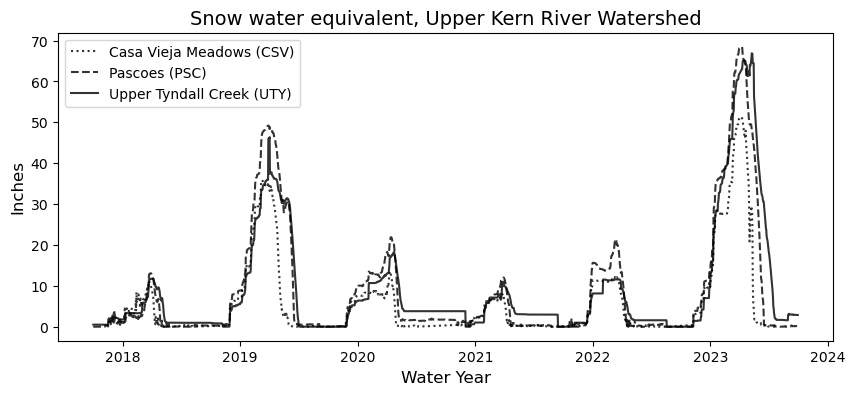

In [435]:
plt.figure(figsize=(10,4))
plt.plot(sliced_CSV['date'], sliced_CSV['Snow water equivalent'], color='k', linestyle='dotted', alpha=0.8, label='Casa Vieja Meadows (CSV)')
plt.plot(sliced_PSC['date'], sliced_PSC['Snow water equivalent'], color='k', linestyle='--', alpha=0.8, label='Pascoes (PSC)')
plt.plot(sliced_UTY['date'], sliced_UTY['Snow water equivalent'], color='k', linestyle='-', alpha=0.8, label='Upper Tyndall Creek (UTY)')
plt.xlabel('Water Year', fontsize=12)
plt.ylabel('Inches', fontsize=12)
plt.legend()
plt.title('Snow water equivalent, Upper Kern River Watershed', fontsize=14)

In [424]:
print('Statistics for Casa Vieja Meadows (CSV)')
print('Mean: ' + str(sliced_CSV['Snow water equivalent'].mean()))
print('Median: ' + str(sliced_CSV['Snow water equivalent'].median()))
print('Std. Dev.: ' + str(sliced_CSV['Snow water equivalent'].std()))
print('Max: ' + str(sliced_CSV['Snow water equivalent'].max()))
print('Min: ' + str(sliced_CSV['Snow water equivalent'].min()))
print('Mean: ' + str(sliced_CSV['Snow water equivalent'].mean()))
print(' ')
print('Statistics for Pascoes (PSC)')
print('Mean: ' + str(sliced_PSC['Snow water equivalent'].mean()))
print('Median: ' + str(sliced_PSC['Snow water equivalent'].median()))
print('Std. Dev.: ' + str(sliced_PSC['Snow water equivalent'].std()))
print('Max: ' + str(sliced_PSC['Snow water equivalent'].max()))
print('Min: ' + str(sliced_PSC['Snow water equivalent'].min()))
print(' ')
print('Statistics for Upper Tyndall Creeek (UTY)')
print('Mean: ' + str(sliced_UTY['Snow water equivalent'].mean()))
print('Median: ' + str(sliced_UTY['Snow water equivalent'].median()))
print('Std. Dev.: ' + str(sliced_UTY['Snow water equivalent'].std()))
print('Max: ' + str(sliced_UTY['Snow water equivalent'].max()))
print('Min: ' + str(sliced_UTY['Snow water equivalent'].min()))

Statistics for Casa Vieja Meadows (CSV)
Mean: 7.8606377383300465
Median: 3.25
Std. Dev.: 11.427688468704378
Max: 51.23
Min: 0.0
Mean: 7.8606377383300465
 
Statistics for Pascoes (PSC)
Mean: 8.53670132325142
Median: 1.51
Std. Dev.: 14.505250950671462
Max: 68.5
Min: 0.0
 
Statistics for Upper Tyndall Creeek (UTY)
Mean: 8.671534490849368
Median: 3.33
Std. Dev.: 13.632803973139675
Max: 66.9
Min: 0.0


In [60]:
#--------------------------------#

In [72]:
vals.timeSeries[0].values[0][0]

[(value){
    value = "30.70"
    _censorCode = "nc"
    _dateTime = 1984-01-01 00:00:00
    _timeOffset = "-8"
    _dateTimeUTC = 1984-01-01 08:00:00+00:00
    _methodID = 0
    _sourceID = 1
    _methodCode = "0"
    _sourceCode = "1"
    _qualityControlLevelCode = "1"
  },
 (value){
    value = "30.60"
    _censorCode = "nc"
    _dateTime = 1984-01-02 00:00:00
    _timeOffset = "-8"
    _dateTimeUTC = 1984-01-02 08:00:00+00:00
    _methodID = 0
    _sourceID = 1
    _methodCode = "0"
    _sourceCode = "1"
    _qualityControlLevelCode = "1"
  },
 (value){
    value = "30.40"
    _censorCode = "nc"
    _dateTime = 1984-01-03 00:00:00
    _timeOffset = "-8"
    _dateTimeUTC = 1984-01-03 08:00:00+00:00
    _methodID = 0
    _sourceID = 1
    _methodCode = "0"
    _sourceCode = "1"
    _qualityControlLevelCode = "1"
  },
 (value){
    value = "30.20"
    _censorCode = "nc"
    _dateTime = 1984-01-04 00:00:00
    _timeOffset = "-8"
    _dateTimeUTC = 1984-01-04 08:00:00+00:00
    _methodI

In [65]:
serv.get_data_providers()

,servURL,Title,ServiceDescriptionURL,Email,phone,organization,orgwebsite,citation,aabstract,valuecount,variablecount,sitecount,ServiceID,NetworkName,minx,miny,maxx,maxy,serviceStatus
0,https://hydroportal.cuahsi.org/NEON/cuahsi_1_1...,National Ecological Observatory Network,http://hiscentral.cuahsi.org/pub_network.aspx?...,mseul@cuahsi.org,None,National Ecological Observatory Network,https://data.neonscience.org/,National Ecological Observatory Network. 2016....,The National Ecological Observatory Network pr...,665627184,17,2394,5655,NEON,-156.619300,17.96899,-66.797530,71.282420,None
1,https://hydroportal.cuahsi.org/LTERNTLWoodruff...,LTER NTL Woodruff Airport Metstation,http://hiscentral.cuahsi.org/pub_network.aspx?...,ntl.infomgr@gmail.com,None,LTER NTL North Temperate Lakes,https://lter.limnology.wisc.edu,"J. Magnuson, S. Carpenter, E. Stanley. 2010. N...",Woodruff Airport is the closest metstation to ...,2026414,5,1,5657,LTERNTLWoodruff,-89.734000,45.92500,-89.734000,45.925000,None
2,https://hydroportal.cuahsi.org/Andrewsforestlt...,Streamflow data from Andrews Forest LTER,http://hiscentral.cuahsi.org/pub_network.aspx?...,hjadata@fsl.orst.edu,None,Andrews Forest LTER,https://andrewsforest.oregonstate.edu,"Johnson, S.; Rothacher, J. 2018. Stream discha...",Streamflow records from small watersheds began...,20263,4,34,5658,AndrewsforestLTER,-71.182910,42.55282,-70.819020,42.698130,None
3,https://www4.des.state.nh.us/WaterOneFlow/cuah...,New Hampshire Geological Survey Water Oneflow ...,http://hiscentral.cuahsi.org/pub_network.aspx?...,gregory.barker@des.nh.gov,603-271-7332,New Hampshire Geological Survey,https://www.des.nh.gov/organization/commission...,None,None,18766717,10,3008,5661,NHGS_WOF,-72.758040,40.00000,-68.418370,45.271700,None
4,https://hydroportal.cuahsi.org/NooksackObserva...,Nooksack Microclimate Network,http://hiscentral.cuahsi.org/pub_network.aspx?...,jbeaulieu@nooksack-nsn.go,None,Nooksack Indian Tribe,https://nooksacktribe.org/departments/natural-...,"Data Resource: J. Beaulieu, Bandaragoda, C., C...","Air temperature, ground temperature and relati...",8998,3,6,5660,Nooksack Microclimate Network,-121.807400,48.84810,-121.655500,48.905320,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,https://hydroportal.cuahsi.org/czo_catalina/cu...,Catalina-Jemez CZO - Santa Catalina Mountains,http://hiscentral.cuahsi.org/pub_network.aspx?...,patroch@hwr.arizona.edu,520-626-1277,University of Arizona,http://criticalzone.org/catalina-jemez/,Logistical support and/or data were provided b...,This data service provides data collected from...,6748694,10,25,177,czo_catalina,-110.840500,32.42610,-110.739900,32.559950,None
95,https://hydroportal.cuahsi.org/EPA_Lake_Harsha...,EPA_Lake_Harsha,http://hiscentral.cuahsi.org/pub_network.aspx?...,simon.michelle@epa.gov,None,US EPA,https://archive.epa.gov/epa/aboutepa/about-nat...,EPA Harsha Lake Project,None,16375,9,28,5578,EPA_Lake_Harsha_Data,-84.295030,38.99054,-83.914850,39.216820,None
96,https://hydroportal.cuahsi.org/nevados/cuahsi_...,Los Nevados,http://hiscentral.cuahsi.org/pub_network.aspx?...,Help@cuahsi.org,339-221-5400,Escuela de Ingenieria de Antioquia,http://www.eia.edu.co,Los Nevados Observatory. Accessed via the CUAH...,This data set has been created by the Escuela ...,3945600,3,20,5606,Nevados,-75.539110,4.81970,-75.351940,4.982278,None
97,https://hydroportal.cuahsi.org/Ramsar_atacama/...,Humedales RAMSAR Atacama,http://hiscentral.cuahsi.org/pub_network.aspx?...,help@cuahsi.org,None,"Ministerio del Medio Ambiente (MMA), Región de...",http://portal.mma.gob.cl/region-de-atacama/,"Humedales RAMSAR Atacama, Ministerio del Medio...",The Environmental Regional Secretary for the A...,137825,16,7,5607,MMA_Atacama,-69.174140,-27.46561,-68.974950,-26.840560,None


In [73]:
serv.wsdl

'https://hiscentral.cuahsi.org/webservices/hiscentral.asmx?wsdl'